# Introduction

In this notebook, we'll take a very brief look at simulation, and how it can help in quantitative analysis of a problem.  Later, we'll look at spatial contexts, but the purpose here is only to:
<ul>
    <li>familiarize you with notebooks in general,</li>
    <li>introduce you to numpy, and random number generation,</li>
    <li>and make a simple simulation to estimate mortage failure rates</li>
</ul>

# Jupyter Notebooks

Jupyter Notebooks are way to interactively write programs.  While we'll use notebooks to write Python, you can use them to write in any number of languages.

Jupyter has <b>cells</b> or <b>code blocks</b>.  The open space lets you write text or programs.  If you're writing text, we indicate that the cell is a <b>markdown</b> cell.  You can use the GUI above to declare a cell a markdown cell, or you can use hotkeys.  You'll get more familiar with these as you go.

If you click into a codeblock, you can also also observe the color.  If it's green, you're currently editing.  If it's blue, you can enter the <b>command mode</b> where you can do things like change the type of cell from markdown to a <b>code</b> cell.  If you hit <b>escape</b> you change from editing to command mode.  Go to the <b>help</b> menu above and choose <b>keyboard shortcuts</b>.  These are handy keys to do things like insert blocks, run code blocks, and so on.  

<b>Before you begin, rename this file by clicking on the title at the top, and adding your last name to the beginning of the filename.  You'll upload this file later for credit.</b>

Let's try writing some simple code, just to see how Jupyter works.

In [ ]:
# Comments work just as before
# Hit shift-enter to run this code

x = 5
print(x)

In [ ]:
a = 2
b = 9
c = a + b
print(c)

In [ ]:
for i in range(10):
    print(i**2)

<b>(1) Play along!  Write 8 codeblocks worth of simple python code like you see above, and run them.</b>

# NumPy, SciPy, and Matplotlib

One of the handier toolkits in Python is <a href="https://en.wikipedia.org/wiki/NumPy" target="_blank">NumPy</a> (for simplicity, we'll drop the mixed case from here on out, and just call it numpy).  Numpy is a suite of tools for performing all types of calculation, particularly involving arrays and matrices.  It is the backbone of <a href="https://en.wikipedia.org/wiki/SciPy" target="_blank">SciPy</a> which includes many other components, including statistical processing.  <a href="https://en.wikipedia.org/wiki/Matplotlib" target="_blank">Matplotlib</a> is the third package we'll see today.  It's used to graph data.

In [ ]:
# We load these with import statements.  These are some typical commands, and note each's slightly unique form:

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

Numpy's great benefit is that it allows us to add, subtract, multiply, <b>manipulate</b>, arrays as if they were single variables:

In [ ]:
a = np.array([1,6,9,10])
b = np.array([5,2,4,12])
print(a+b)
print(a-b)
print(a*b)
print(a**3)

<b>(2) Play along! Create five different arrays, at least three of the same length (i.e, with the same number of <u>elements</u>), and perform some kind of basic calculation on them.  What happens if you try to add/subtract/multiply two arrays of different length?</b>

## Generating random numbers

We'll use numpy later as part of a way to analyze rasters.  But for now, let's take a look at one of the useful features for modeling: random numbers.

Random number generators are crucial for modeling.  They let us take deterministic models, where everything is known, and add a layer of unpredictability.  There are many random number generators in numpy, but we'll use two: a <a href="https://docs.scipy.org/doc/numpy-1.14.1/reference/generated/numpy.random.rand.html#numpy.random.rand" target="_blank">uniform random number generator</a>, and a <a href="https://docs.scipy.org/doc/numpy-1.14.1/reference/generated/numpy.random.randn.html#numpy.random.randn" target="_blank">normal distribution random number generator</a>.

In [ ]:
# Run this code block several times.
# Hitting control-enter instead of shift-enter will keep you focused on the same codeblock instead of advancing to the next.

x = np.random.rand(1)
print(x)

<b>(3) Play along!  What happens when you change the number from 1 to something else?  What's the largest number that gets generated?  What's the smallest?</b>

<b>(4) Play along!  Generate two arrays (a and b) of lenth 10, and show their sum, difference, and product.</b>

You can use greater than, less than, and equality to make <b>tests</b> of the data.

In [ ]:
x = np.random.rand(100)
print(x<.5)

In [ ]:
# How many would you expect to be greater than .5?  Run this code block many times, and observe the results.  

x = np.random.rand(100)

# You can 
print(sum(x>.5))
print(np.sum(x>.5))

<b>(5) Play along!  How many times did you run the code?  Did the results conform to your expectations?  Why or why not?</b>

It's possible to create a very, very large collection of random numbers, and you can create them in more than one dimension.

In [ ]:
# Create 10 thousand random numbers
x = np.random.rand(10000)
print(x)

You'll notice that we can't print all these out to the screen (or, rather, we by default avoid doing so).  In the case of large numbers it's often helpful to graph them.  A histogram comes in handy here, and we'll use our matplotlib handle ("plt") to call that function.

In [ ]:
x = np.random.rand(10000)
_ = plt.hist(x,bins=50)

In the above code, we are "collecting" the output from hist (which contains bin information and counts) into a "garbage" variable - the underscore - because we're just interested in seeing the plot.  From the plot, you can identify trends.

<b>(6) Play along! Does your collection of numbers look random?  How can you tell?

We can create two <b>vectors</b> (used here to mean a one-dimensional array), and create a scatterplot to view their relationship.

In [ ]:
a = np.random.rand(100)
b = np.random.rand(100)
plt.scatter(a,b)

<b>(7) Play along!  Does this look random?  Why or why not?</b>

In [ ]:
# We can also create a two dimensional array of random numbers:

x = np.random.rand(5,5)
print(x)

In [ ]:
# And can view a large collection like this with either "image" or "pcolormesh" (both work similarly)

x = np.random.rand(500,500)
# plt.imshow(x) or
plt.pcolormesh(x,cmap='gray')

<b>(8) Play along!  The appearance of the above plot can be configured with the "cmap" parameter. Get help with the tool by putting your cursor on "pcolormesh" and hitting shift-tab to bring up a tool tip.  If you click on the plus sign, you'll get even more help.  You can find out more information about colormaps in <a href="https://matplotlib.org/examples/color/colormaps_reference.html" target="_blank">the documentation</a>.  Experiment by changing the colormap - replace "gray" with something else.  Try at least 5, and leave it on your favorite.</b> 

Let's look at one more random number generator... one that creates normally distributed random numbers.  We can do this by using a slightly different function.  Run the next codeblock several times, and then answer the question.

In [ ]:
x = np.random.randn(1)
print(x)

<b>(8) Play along!  How are the numbers generated here different than the uniform random number generator?  Run the codeblock at least 20 times, and then tell me what your largest and smallest numbers were.</b>

In [ ]:
# The number generator otherwise runs pretty similarly.  For instance:

x = np.random.randn(10000)
_ = plt.hist(x,bins=50)

<b>(9) Play along!  What did this code do?  How does it differ from the previous histogram of an array of uniform random numbers?</b>

In [ ]:
a = np.random.randn(100)
b = np.random.randn(100)
plt.scatter(a,b)

<b>(10) Play along!  What did this code do?  How does it differ from the previous scatterplot of two arrays of uniform random numbers?</b>

In [ ]:
x = np.random.randn(500,500)
plt.pcolormesh(x,cmap='gray')

<b>(11) Play along!  What did this code do?  How does it differ from the previous image of a 2D array of uniform random numbers?</b>

## SciPy.Stats

We're just going to put a toe into the water on scipy.stats, which you can use to perform nearly any kind of quantitative analysis that you might be interested in.  Take a look at <a href="https://docs.scipy.org/doc/scipy/reference/stats.html" target="_blank">the functions available</a>, and see if anything looks familiar.

<b>(11) Play along!  Name 5 functions that look familiar to you from a statistics class you might have taken.</b>

One key measure of analysis is correlation, or the degree of similarity between two paired sets of observations.

In [ ]:
# Create two random vectors, and find the correlation between them (r) and p-value of the correlation (p).
a = np.random.randn(20)
b = np.random.randn(20)
r,p = stats.pearsonr(a,b)

plt.scatter(a,b)
_ = plt.title('correlation = ' + str(np.round(r,decimals=2)))

<b>(12) Play along! Run the above code block until you achieve a correlation of .5 or better.  How many iterations (tries) did it take?</b>

# Modeling mortgage failure

In The Signal and the Noise, Chapter 1, Nate Silver outlines a very simplified CDO (collateralized debt obligation).  The idea is that the risk and reward should be commensurate.  They're divided up into several pools (Alpha through Epsilon) that are supposed to be organized from the least risky (Alpha) to the most risky (Epsilon).  The table below summarizes their organization and risk:

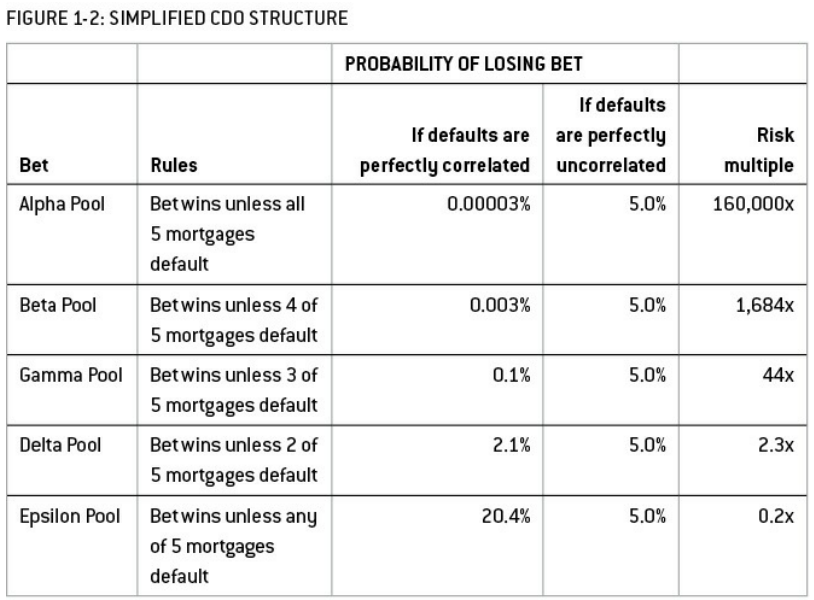

How can we simulate this (or similar) situation to find out what the risks really are?  We an use a random number generator to explore some scenarios.

The idea behind the alpha scenario is that it pays unless all five default, and each mortgage has a five percent chance of defaulting.  We could model that simply like this:

In [ ]:
x = np.random.rand(5)
print(np.round(x,decimals=2))
result = np.all(x < .05)
print("Did they all fail?", result)

Rerun the code block as much as you like.  Did you find one where all the mortgages failed?  In this case, for each mortgage, we generate a random number.  If it is less that .05 (five percent) then we assume it failed.  We then ask if all of them failed (where all the values True?), and if so we report "True".  Otherwise, we say "False".  You should be able to run this as many times as you want, and it probably won't happen.  There's only one chance in 3,200,000 that it will fail!

## Bad simulation: Looping

We can try to approximate this by running this simulation many, many times (rather than pressing control-enter).  In other languages, we might loop to do this, although in Python we usually try to avoid this, as it's unnecessarily time consuming.  A looping solution might look like this:

In [ ]:
k = 5 * 10**6
for i in range(k):
    x = np.random.rand(5)
    result = np.all(x < .05)
    if result==True:
        print("Iteration",i,"failed!")
        print(x)

<b>(13) Play along!  Time the above code.  How long did it take to run?  Did you find a failure?  In your own words, how does this code work?</b>

## Better simulation: All at once

A better approach to this simulation is to generate all the random numbers you'll need right away.  This uses more memory, but is much, much faster.

In [ ]:
# This tests twenty alpha pools (each with five mortgages) at the same time.  Run it several times.  Hit anything?
k = 20
x = np.random.rand(k,5)
result = np.all(x < .05, axis=1)
print(result)

In [ ]:
k = 5 * 10**6
x = np.random.rand(k,5)
result = np.all(x < .05, axis=1)
result = np.any(result==True)

if result==True:
    print("We had a failure!")
else:
    print("No failures in this bunch.")

<b>(14) Play along!  Run the above code a few times.  How long does it take to run?  In your own words, try to explain how this code works.</b>

Depending on the complexity of your simulation, you can break it into several pieces in a hybrid-like approach.  We'll get into more complicated examples later.

## Tabulating failure rates:

We can try to assess the odds that Nate Silver presents by running a larger simulation.

In [ ]:
k = 10**7  # 10 million runs
x = np.random.rand(k,5) < .05
result = np.sum(x,axis=1)

print(np.sum(result>=5),"in 10 million had all five fail.")
print(np.round(100*np.sum(result>=4)/k,decimals=3),"% had at least four failures.")
print(np.round(100*np.sum(result>=3)/k,decimals=1),"% had at least three failures.")
print(np.round(100*np.sum(result>=2)/k,decimals=1),"% had at least two failures.")
print(np.round(100*np.sum(result>=1)/k,decimals=1),"% had at least one failure.")

<B>(15) Play along! Run the above code a few times. How do the results compare to those Silver presents in Table 1-2?</b>